In [54]:
import pandas as pd
import numpy as np
import csv
import random

In [55]:
leaves = pd.read_csv("leaf/leaf.csv")
leaves

,class,number,eccentricity,aspect_ratio,elongation,solidity,convexity,iso_factor,depth,lobedness,intensity,contrast,smoothness,third_moment,uniformity,entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214
5,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.844820,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068
6,1,7,0.82063,1.7529,0.44458,0.97964,0.99649,0.767700,0.005928,0.006395,0.018375,0.080587,0.006452,0.002271,0.000041,0.53904
7,1,8,0.77982,1.6215,0.39222,0.98512,0.99825,0.808160,0.005099,0.004731,0.024875,0.089686,0.007979,0.002466,0.000147,0.66975
8,1,9,0.83089,1.8199,0.45693,0.98240,1.00000,0.771060,0.006005,0.006564,0.007245,0.040616,0.001647,0.000388,0.000033,0.33696
9,1,10,0.90631,2.3906,0.58336,0.97683,0.99825,0.664190,0.008402,0.012848,0.007010,0.042347,0.001790,0.000459,0.000028,0.28082


# a. Randomly pick 5 samples from each class for training

In [56]:
def select_random(num):
    
    train = pd.DataFrame(columns=["class", "number", "eccentricity", "aspect_ratio", "elongation", "solidity", "convexity", "iso_factor", "depth", "lobedness", "intensity", "contrast", "smoothness", "third_moment", "uniformity", "entropy"])
    test = pd.DataFrame(columns=["class", "number", "eccentricity", "aspect_ratio", "elongation", "solidity", "convexity", "iso_factor", "depth", "lobedness", "intensity", "contrast", "smoothness", "third_moment", "uniformity", "entropy"])
    
    # There are 36 total classes
    for x in range(1, 37):
        # For some reason, classes 16 through 21 are missing
        # So skip these, because the dataframe will be empty
        if(x > 15 and x < 22):
            continue
        
        # If the class number is valid, take that class and re-index starting from 0
        leaf_class = leaves.loc[leaves['class'] == x]
        leaf_class = leaf_class.reset_index(drop=True)
        
        # For each class, select num random samples
        for i in range(0, num):
            # Randomly select a position
            pos = random.randrange(0, leaf_class.shape[0])
            
            # Record the sample 
            train = train.append(leaf_class.loc[leaf_class.index[pos]], ignore_index=True)
            
            # remove the sample from the leaf_class so that it will not be re-used
            leaf_class = leaf_class[leaf_class.index != pos]
            leaf_class = leaf_class.reset_index(drop=True)
            
        # After the loop ends, any leftover samples belong in the testing set
        for i in range(0, leaf_class.shape[0]):
            test = test.append(leaf_class.loc[leaf_class.index[i]], ignore_index=True)
        
    return train, test     

In [57]:
train, test = select_random(6)

# b/c. Build a KNN (k = 1) classifier using n examples from each class where n = 1, 2, 3, 4, 5, and 6. 

First, define some functions:<br/>
<ol>
    <li>Select n examples from the training dataset</li>
    <li>Drop the number column from the dataset, and move the class into a new y variable</li>
</ol>

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [59]:
def select_from_train(num):
    subset = pd.DataFrame(columns=["class", "number", "eccentricity", "aspect_ratio", "elongation", "solidity", "convexity", "iso_factor", "depth", "lobedness", "intensity", "contrast", "smoothness", "third_moment", "uniformity", "entropy"])
    leaf_class = pd.DataFrame(columns=["class", "number", "eccentricity", "aspect_ratio", "elongation", "solidity", "convexity", "iso_factor", "depth", "lobedness", "intensity", "contrast", "smoothness", "third_moment", "uniformity", "entropy"])
    
    # There are 36 total classes
    for x in range (1, 37):
        # Classes 16 through 21 missing
        if(x > 15 and x < 22):
            continue
        
        # If the class number is valid, then take that class and re-index from 0
        leaf_class = train.loc[train['class'] == x]
        leaf_class = leaf_class.reset_index(drop=True)
        
        # get num samples from each class of the train dataset
        for i in range (0, num):
            # Randomly select a position
            pos = random.randrange(0, leaf_class.shape[0])
            
            # Record the sample
            subset = subset.append(leaf_class.loc[leaf_class.index[pos]], ignore_index=True)
            
            # Remove the sample from the temp dataframe so that it will not be re-selected
            leaf_class = leaf_class[leaf_class.index != pos]
            leaf_class = leaf_class.reset_index(drop=True)
        
    # After the loop ends, train remains in-tact, and we now have num samples from train stored in subset
    return subset

In [60]:
# Drops the number column and moves the class column into a y variable
def drop_columns(df):
    df_y = df.iloc[:, 0]
    df_X = df.drop(columns=['class', 'number'])
    
    return df_X, df_y

With our functions defined, start with n = 1.

In [61]:
test_X, test_y = drop_columns(test)

In [68]:
# n = 1
knn = KNeighborsClassifier(n_neighbors = 1)

subset = select_from_train(1)
train_X, train_y = drop_columns(subset)

knn.fit(train_X, train_y)
score_1 = knn.score(test_X, test_y)
score_1

0.44375

In [84]:
# n = 2
knn = KNeighborsClassifier(n_neighbors = 1)

subset = select_from_train(2)
train_X, train_y = drop_columns(subset)

knn.fit(train_X, train_y)
score_1 = knn.score(test_X, test_y)
score_1

0.55

In [77]:
# n = 3
knn = KNeighborsClassifier(n_neighbors = 1)

subset = select_from_train(3)
train_X, train_y = drop_columns(subset)

knn.fit(train_X, train_y)
score_1 = knn.score(test_X, test_y)
score_1

0.45625

In [52]:
# n = 4
knn = KNeighborsClassifier(n_neighbors = 1)

subset = select_from_train(4)
train_X, train_y = drop_columns(subset)

knn.fit(train_X, train_y)
score_1 = knn.score(test_X, test_y)
score_1

0.59375

In [53]:
# n = 5
knn = KNeighborsClassifier(n_neighbors = 1)

subset = select_from_train(5)
train_X, train_y = drop_columns(subset)

knn.fit(train_X, train_y)
score_1 = knn.score(test_X, test_y)
score_1

0.56875

In [40]:
# n = 6
knn = KNeighborsClassifier(n_neighbors = 1)

subset = select_from_train(6)
train_X, train_y = drop_columns(subset)

knn.fit(train_X, train_y)
score_1 = knn.score(test_X, test_y)
score_1

0.58125

# d. repeat steps (a), (b), and (c) 20 times. Compute their mean testing accuracies and the corresponding standard deviation.

In [103]:
from math import sqrt

In [121]:
def get_acc_and_sd(n):
    
    knn = KNeighborsClassifier(n_neighbors = 1) # Our KNN classifier with k = 1
    results = []  # This will store the scores of all 20 iterations

    for i in range(0, 20):
        # Randomly pick 6 examples for training
        train, test = select_random(6)

        # Randomly pick n samples from train
        subset = select_from_train(n)

        # Drop unneeded columns
        train_X, train_y = drop_columns(subset)
        test_X, test_y = drop_columns(test)

        # Fit classifier
        knn.fit(train_X, train_y)

        # Record the score for the model
        results.append(knn.score(test_X, test_y))
        
    # Calculate the mean of the 20 runs
    # Accuracy:
    mean_accuracy = sum(results)/20 
    # Standard Deviation:
    squared_diff = 0
    for idx in range(0, 20):
        # Subtract the testing_accuracy from the result
        temp = results[idx] - mean_accuracy
        # Then square
        temp = temp * temp
        # Store the value
        squared_diff += temp
    # Find the mean of the squared differences.
    # This gives variance, so to get standard deviation, take the square root
    sd = sqrt(squared_diff/20)
        
    return (mean_accuracy, sd)

In [130]:
# n = 1
acc_1, sd_1 = get_acc_and_sd(1)
print(acc_1, " ", sd_1)

0.45062499999999994   0.03816596160193005


In [131]:
# n = 2
acc_2, sd_2 = get_acc_and_sd(2)
print(acc_2, " ", sd_2)

0.5506249999999999   0.028634277972388274


In [132]:
# n = 3
acc_3, sd_3 = get_acc_and_sd(3)
print(acc_3, " ", sd_3)

0.6359375   0.029439755752213713


In [133]:
# n = 4
acc_4, sd_4 = get_acc_and_sd(4)
print(acc_4, " ", sd_4)

0.6959374999999999   0.030953278804514393


In [134]:
# n = 5
acc_5, sd_5 = get_acc_and_sd(5)
print(acc_5, " ", sd_5)

0.7556250000000001   0.018843516789601673


In [135]:
# n = 6
acc_6, sd_6 = get_acc_and_sd(6)
print(acc_6, " ", sd_6)

0.8159375000000001   0.017619569198763067


# e. Plot a graph of the mean accuracies (y-axis) and standard deviation (error bar for mean accuracies) against the number of training examples (x-axis).

In [138]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [136]:
# Defining axes and points for the graph
acc = [(acc_1 * 100), (acc_2 * 100), (acc_3 * 100), (acc_4 * 100), (acc_5 * 100), (acc_6 * 100)]
sd = [(sd_1 * 100), (sd_2 * 100), (sd_3 * 100), (sd_4 * 100), (sd_5 * 100), (sd_6 * 100)]
n = [1, 2, 3, 4, 5, 6]

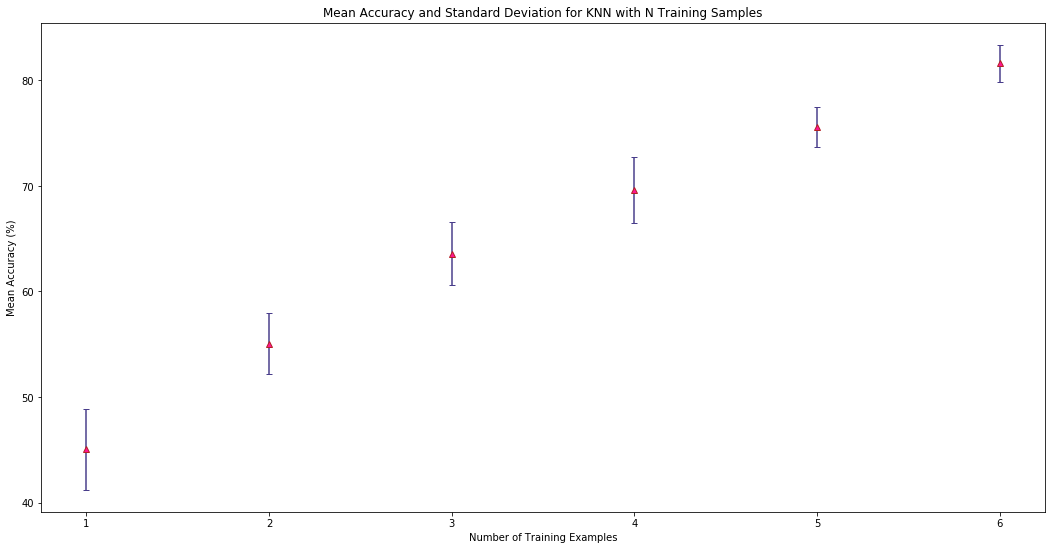

In [189]:
# Lines
plt.errorbar(n, acc, sd, linestyle='None', marker='^', color='darkslateblue', markeredgecolor='firebrick', markerfacecolor='deeppink', capsize=3)
# Axes
plt.xlabel('Number of Training Examples')
plt.ylabel('Mean Accuracy (%)')
# Title
plt.title('Mean Accuracy and Standard Deviation for KNN with N Training Samples')
# Size
plt.rcParams["figure.figsize"] = [18, 9]

plt.show()